<a href="https://colab.research.google.com/github/schittap/Mathematical-Finance/blob/main/stock_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description:**
How does the potential profitability of a stock vary by its ticker as well as the beginning month/year of our observations? Here, I use opening price minus closing price as a metric that can possibly explain if it is wise to invest in a stock based on its historical data where frequency is determined by the user. This is supplemented by a time series line plot as well as a KDE-embedded histogram with basic computed statistics for volatility.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Graphs of User-Inputted Ticker's Difference Between Opening and Closing Prices Over Time Using Yahoo Finance API, NumPy, Pandas, Matplotlib, and Seaborn**

Enter stock ticker (e.g. AAPL): PLTR
Enter frequency:
6 months = "6mo"
1 year = "1y"
2 years = "2y"
5 years = "5y"
10 years = "10y"
Year-to-date = "ytd"
All time = "max"
Desired Duration: 6 months
Try again, using the above options: 6mo
Generating graphs:


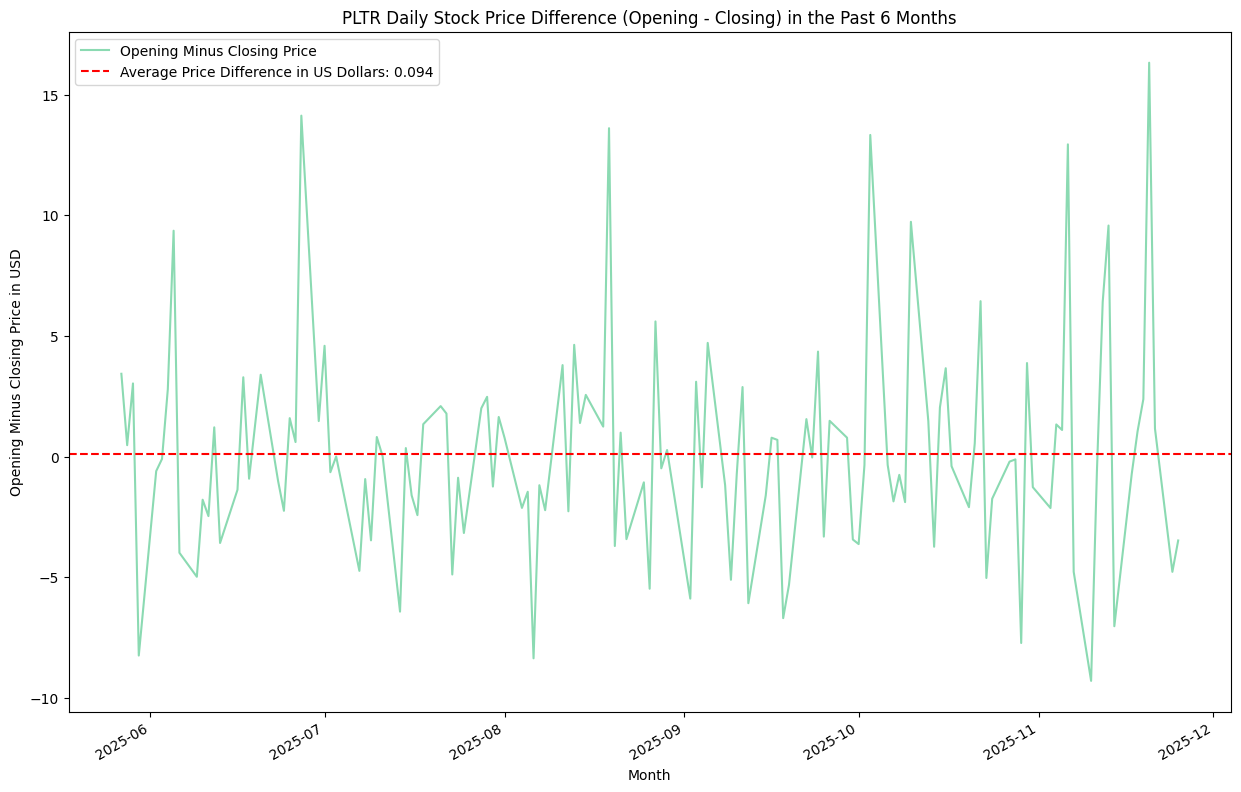

<Figure size 640x480 with 0 Axes>

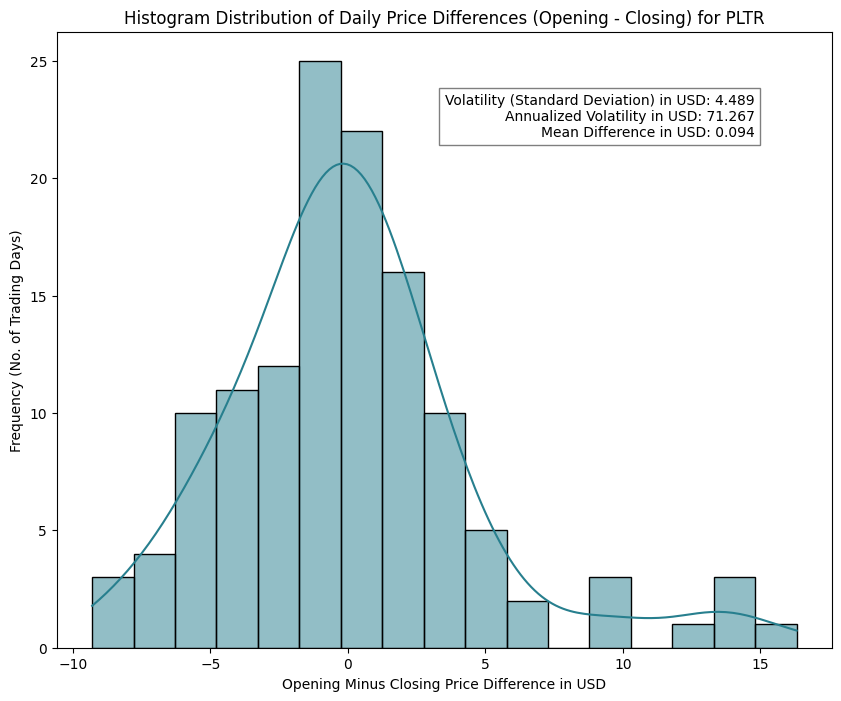

In [ ]:
stock_ticker = input("Enter stock ticker (e.g. AAPL): ")
stock_ticker_yf = yf.Ticker(stock_ticker)
length = input("Enter frequency:\n6 months = \"6mo\"\n1 year = \"1y\"\n2 years = \"2y\"\n5 years = \"5y\"\n10 years = \"10y\"\nYear-to-date = \"ytd\"\nAll time = \"max\"\nDesired Duration: ")
end_title = "in the Past"
end_duration = ""

acceptable_lengths = {"6mo", "1y", "2y", "5y", "10y", "ytd", "max"}

# In case the user inputs something besides the formatted durations
while (length not in acceptable_lengths):
  length = input("Try again, using the above options: ")

# Affects the title and x-axis
x_axis = ""
if (length == "6mo" or length == "1y" or length == "2y"):
  x_axis = "Month"
else:
  x_axis = "Year"

if (length == "6mo"):
  end_duration = end_title + " 6 Months"
elif (length == "1y"):
  end_duration = end_title + " Year"
elif (length == "2y"):
  end_duration = end_title + " Two Years"
elif (length == "5y"):
  end_duration = end_title + " Five Years"
elif (length == "10y"):
  end_duration = end_title + " Ten Years"
elif (length == "ytd"):
  end_duration = end_title + " Since Jan 1 of This Year"
elif (length == "max"):
  end_duration = "Over Time"

ticker_data = stock_ticker_yf.history(period = length)

if ticker_data.empty:
  print("Error: Could not retrieve data for " + str(stock_ticker) +
        " over the period " + str(length) + ".")
else:
  daily_difference = ticker_data["Open"] - ticker_data["Close"]
  ticker_data["Daily_Diff"] = daily_difference

  # NumPy functions
  volatility = np.std(daily_difference)
  average_difference = np.mean(daily_difference)

  print("Generating graphs:")

  plt.figure(figsize = (15, 10))

  daily_difference.plot(
      title = "" + str(stock_ticker) +
      " Daily Stock Price Difference (Opening - Closing) " +
      str(end_duration) + "",
      label = "Opening Minus Closing Price",
      color = sns.color_palette("mako")[5]
  )

  plt.axhline(average_difference, color = "red", linestyle = "--",
              label = "Average Price Difference in US Dollars: " +
              str(format(average_difference, ".3f")) + "")

  plt.xlabel(x_axis)
  plt.ylabel("Opening Minus Closing Price in USD")
  plt.legend()
  plt.show()
  plt.tight_layout()

  # Histogram with KDE implemented to estimate a density curve
  plt.figure(figsize = (10, 8))
  sns.histplot(data = ticker_data,
               x = "Daily_Diff",
               kde = True,
               color = sns.color_palette("viridis")[2])

  plt.title("Histogram Distribution of Daily Price Differences (Opening - Closing) " +
            "for " + str(stock_ticker))
  plt.xlabel("Opening Minus Closing Price Difference in USD")
  plt.ylabel("Frequency (No. of Trading Days)")

  plt.text(x = 0.9, y = 0.9,
           s = "Volatility (Standard Deviation) in USD: " +
           format(volatility, ".3f") +
           "\nAnnualized Volatility in USD: " +
           format(volatility * math.sqrt(252), ".3f") +
           "\nMean Difference in USD: " + format(average_difference, ".3f"),
           transform = plt.gca().transAxes,
           ha = "right",
           va = "top",
           bbox = dict(facecolor = "white",
                       alpha = 0.5))
  plt.show()

# (ticker_data['Open'] -
#  ticker_data['Close']).plot(title = str(stock_ticker) +
#                                                   " Stock's Difference Between Opening and Closing Price " +
#                           end_duration, color = 'darkgreen')
# sns.set_style("whitegrid")
# plt.xlabel("Year/Month")
# plt.ylabel("Opening Minus Closing Price in US Dollars")